<a href="https://colab.research.google.com/github/Sachinkry/deep-learning/blob/main/Makemore_Bigram_AKarpathy_lec02_plus_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [ ]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:
max(len(w) for w in words)  # the longest name: 15 char

15

In [ ]:
min(len(w) for w in words)

2

In [ ]:
h = zip('emma', 'mxa')
for x in h:
  print(x)
h

('e', 'm')
('m', 'x')
('m', 'a')


In [ ]:
list('emma')

['e', 'm', 'm', 'a']

### Bigrams

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
for w in words[:1]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a


In [ ]:
b = {}     # dictionary to map what comes after a character and how many times
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>']

  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)

    b[bigram] = b.get(bigram, 0) + 1
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [ ]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [ ]:
b.items()

dict_items([(('<S>', 'e'), 1), (('e', 'm'), 1), (('m', 'm'), 1), (('m', 'a'), 1), (('a', '<E>'), 3), (('<S>', 'o'), 1), (('o', 'l'), 1), (('l', 'i'), 1), (('i', 'v'), 1), (('v', 'i'), 1), (('i', 'a'), 1), (('<S>', 'a'), 1), (('a', 'v'), 1), (('v', 'a'), 1)])

In [ ]:
x = [1, 3, 7, 6]
sorted(x, key = lambda k: -k)

[7, 6, 3, 1]

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1)]

In [ ]:
import torch

In [ ]:
N = torch.zeros((27,27), dtype=torch.int32)

In [ ]:
N.shape

torch.Size([27, 27])

In [ ]:
# get all the unique character from names dataset: 26 chars
chars = sorted(list(set(''.join(words))))

# string to integer mapping
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

# integer to string mapping
itos = {i:s for s,i in stoi.items()}

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
# A lil change in code to make the graph look nicer

import torch
N = torch.zeros((27,27), dtype=torch.int32) # create a (27, 27) zero matrix

for w in words:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    # increase by one in the matrix everytime two characters come together
    # at coordinates (ix1, ix2)
    N[ix1, ix2] += 1

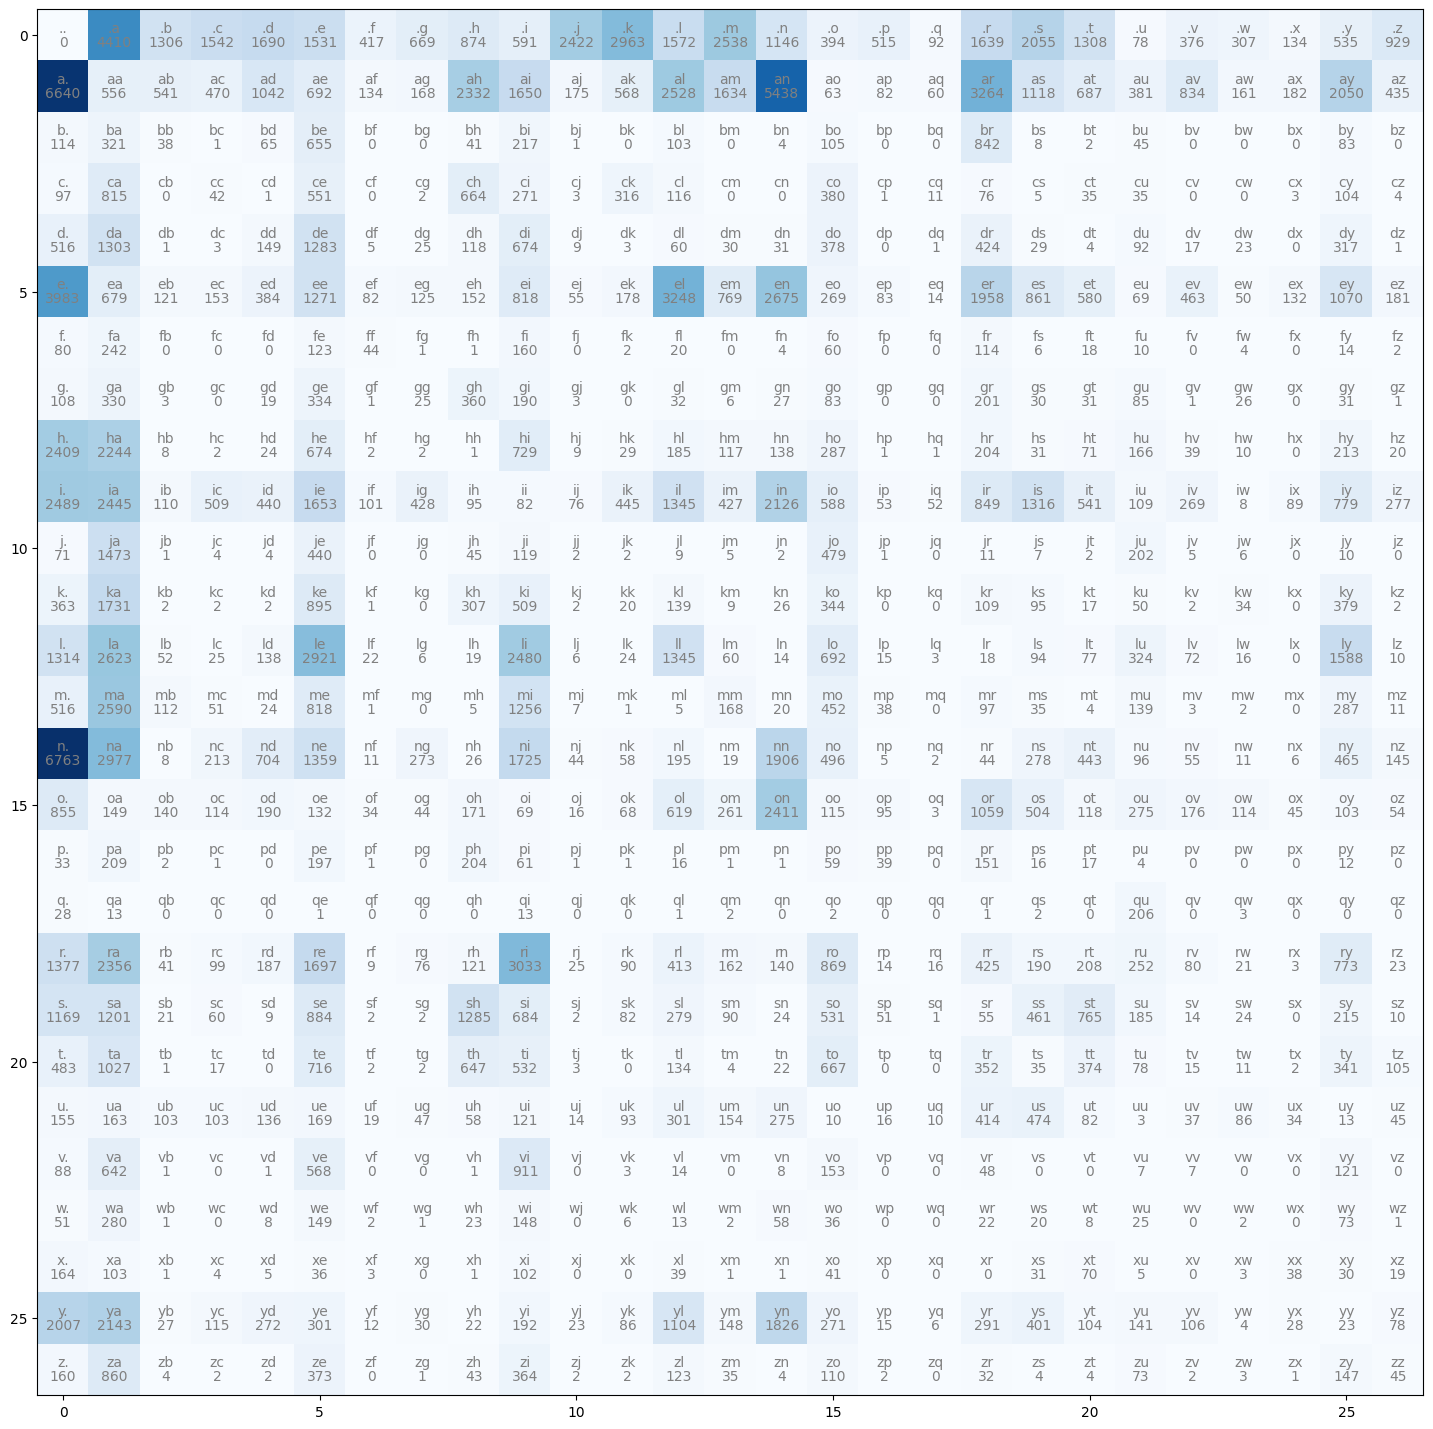

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
# the line below creates an image plot: N is data for image and cmap is the color used
plt.imshow(N, cmap="Blues")

# using for loop to display the values and no of occurings in the data
for i in range(27):
  for j in range(27):
    # concatenate the two alpabets
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
# plt.axis('off')

In [ ]:
N[0,:], N[0]

(tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929], dtype=torch.int32),
 tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929], dtype=torch.int32))

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix], ix

('j', 10)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
N[0]  # get the first row from the matrix N

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
P = N[0].float() #convert them into floats
P

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [ ]:
P.shape

torch.Size([27])

In [ ]:
P.sum(0, keepdim=True).shape

torch.Size([1])

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)
P[0], P.shape, P.sum

(tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02]),
 torch.Size([27, 27]),
 <function Tensor.sum>)

In [ ]:
# it generates the same output to whoever uses this seed value
g = torch.Generator().manual_seed(2147483648)

#  generate ten names
for i in range(10):

  out = []
  ix = 0
  while True:
    # 1. converting N to float
    p = N[ix].float()

    # 2. calculate probability distribution:
    # each row element / sum of each row element
    p = p / p.sum()
    # p = torch.ones(27) / 27.0     # when each char is equally likely to follow other char

    # 3. sample out a number b/w 0-26 using prob_dist
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


can.
ahior.
slea.
eman.
areiakialaveiphali.
usanari.
mosama.
cah.
cyl.
ah.


In [ ]:
# FINAL CODE

words = open('names.txt', 'r').read().splitlines()

# get all the unique character from names dataset: 26 chars
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}

import torch
N = torch.zeros((27,27), dtype=torch.int32) # create a (27, 27) zero matrix

for w in words:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]

    N[ix1, ix2] += 1

# Plot the graph
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(18,18))
# plt.imshow(N, cmap="Blues")

# for i in range(27):
#   for j in range(27):
#     chstr = itos[i] + itos[j]
#     plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
#     plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

# Calculate Probability distribution and generate names
g = torch.Generator().manual_seed(2147483648)

for i in range(10):

  out = []
  ix = 0
  while True:
    p = N[ix].float()

    p = p / p.sum()

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

can.
ahior.
slea.
eman.
areiakialaveiphali.
usanari.
mosama.
cah.
cyl.
ah.


In [ ]:
# GOAL: maximize likelihood of the data wrt model parameters (statistical modeling)
# equivalent to maximizing the log likelihood(because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average log likelihood

In [ ]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f"{ch1}{ch2}: {logprob: .4f} {prob: .4f}")

print(f"{log_likelihood = }")
nll = - log_likelihood
print(f"{nll = }")
print(f"{nll/n}")


.e: -3.0410  0.0478
em: -3.2793  0.0377
mm: -3.6753  0.0253
ma: -0.9454  0.3885
a.: -1.6305  0.1958
.o: -4.3965  0.0123
ol: -2.5526  0.0779
li: -1.7293  0.1774
iv: -4.1845  0.0152
vi: -1.0476  0.3508
ia: -1.9807  0.1380
a.: -1.6305  0.1958
.a: -1.9835  0.1376
av: -3.7041  0.0246
va: -1.3971  0.2473
a.: -1.6305  0.1958
log_likelihood = tensor(-38.8086)
nll = tensor(38.8086)
2.4255354404449463


### The neural network approach

In [ ]:
# 1. create a training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

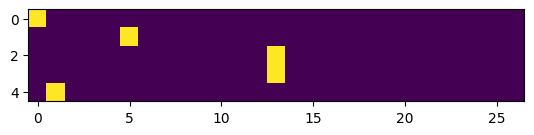

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype, xenc.shape

(torch.float32, torch.Size([5, 27]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27,27), generator=g, requires_grad=True)
xenc @ w

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [ ]:
(xenc @ w).exp()

tensor([[ 4.7940,  0.7888,  0.9730,  0.3326,  1.3309,  0.9708,  0.2129,  1.8311,
          1.0824,  2.4710,  0.6242,  2.1964,  0.7200,  0.6486,  3.9469, 18.7908,
          4.7673,  0.1967,  1.9683,  0.4315,  2.6775,  0.8621,  0.2277,  1.5656,
          0.9317, 12.1434, 11.5281],
        [ 1.6038,  4.4060,  1.3737,  2.8830, 11.0032,  1.5972,  0.5187,  1.8527,
          0.5369,  1.6654,  3.8818,  1.2642,  0.6339,  0.9987,  0.5995,  1.7432,
          1.6073,  0.2499,  5.0680,  1.1876,  2.6871,  1.6596,  2.7728,  0.1486,
          0.6521,  0.1193,  2.6128],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373,
          2.2763,  0.4719,  2.5289,  0.2265,  0.8082,  0.3054,  0.5164,  0.7918,
          4.6866,  1.8232,  0.4921],
        [ 1.2136,  2.8669,  1.8850,  1.2942,  2.6224,  0.7799,  1.0251,  0.9701,
          4.7691,  0.6386,  0.2910,  3.0710,  0.5098,  1.0386,  0.5719,  0.4373

In [ ]:
# 2. forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = (xenc @ w)   # log-counts
counts = logits.exp()   # equivalent N
probs = counts / counts.sum(1, keepdim=True)  # normalize the counts N
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
probs, probs.shape

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]], grad_fn=<DivBackward0>),
 torch.Size([5, 1]))

In [ ]:
probs[0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
# 3. backward pass
w.grad = None   # set to zero the gradient
loss.backward()

In [ ]:
# print(loss.item())
loss.item()

3.7693049907684326

In [ ]:
w.data += -0.1 * w.grad

In [ ]:
w.grad.shape

torch.Size([27, 27])

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item()    # input character index
  y = ys[i].item()    # label character index
  print('-----------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y}) ')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label(actual next character): ', y)
  p = probs[i, y]
  print('probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood: ', logp.item())
  nll = -logp
  print('negative log likelihood: ', nll.item())
  nlls[i] = nll

print('============')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

-----------
bigram example 1: .e (indexes 0,5) 
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label(actual next character):  5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood:  -4.399273872375488
negative log likelihood:  4.399273872375488
-----------
bigram example 2: em (indexes 5,13) 
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label(actual next charac

In [ ]:
probs[0,5], probs[1,13], probs[2,13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [ ]:
[torch.arange(5), ys]

[tensor([0, 1, 2, 3, 4]), tensor([ 5, 13, 13,  1,  0])]

In [ ]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

### Optimization

In [ ]:
# create the dataset

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    # print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
print(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('no of examples:', num)

# intialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
ys.nelement()

tensor([ 0,  5, 13,  ..., 25, 26, 24])
no of examples: 228146


228146

In [ ]:
# gradient descent
for k in range(10):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

2.489959478378296
2.4897918701171875
2.489628314971924
2.489469289779663
2.489313840866089
2.4891626834869385
2.4890148639678955
2.48887038230896
2.48872971534729
2.4885923862457275


In [ ]:
W[5]

tensor([ 2.6947,  0.9217, -0.7440, -0.5329,  0.3543,  1.5493, -1.0880, -0.7131,
        -0.5550,  1.1079, -1.2729, -0.3966,  2.4901,  1.0461,  2.2955,  0.0030,
        -1.0352, -1.9845,  1.9826,  1.1591,  0.7644, -1.1576,  0.5400, -1.6219,
        -0.6813,  1.3768, -0.3783], grad_fn=<SelectBackward0>)

In [ ]:
g = torch.Generator().manual_seed(2147483648)
for i in range(10):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

can.
ahior.
slea.
eman.
areiakialaveiphali.
usanari.
mosama.
cah.
cey.
ah.


In [ ]:
"lol"

'lol'

In [ ]:
W[5]

tensor([ 2.6956e+00,  9.2223e-01, -7.3981e-01, -5.3063e-01,  3.5417e-01,
         1.5501e+00, -1.0845e+00, -7.0831e-01, -5.5953e-01,  1.1085e+00,
        -1.2437e+00, -3.9751e-01,  2.4911e+00,  1.0467e+00,  2.2964e+00,
         2.0698e-03, -1.0211e+00, -1.9604e+00,  1.9835e+00,  1.1598e+00,
         7.6480e-01, -1.1382e+00,  5.4017e-01, -1.6390e+00, -6.8320e-01,
         1.3775e+00, -3.7802e-01], grad_fn=<SelectBackward0>)

In [ ]:
import torch
import torch.nn.functional as F
ix = 3
F.one_hot(torch.tensor([ix]))

tensor([[0, 0, 0, 1]])

---
### Trigrams

In [ ]:
chs = list('.emma.')
two_chs = [ch+chs[i+1] for i,ch in enumerate(chs) if i<len(chs)-1 ]

for ch1, ch2 in zip(two_chs, chs[2:]):
  print(ch1, ch2)

chs

.e m
em m
mm a
ma .


['.', 'e', 'm', 'm', 'a', '.']

In [ ]:
# trigrams #1
t = {}
ch2 = {}


for w in words:
  chs = ['.'] + list(w) + ['.']
  two_chs = [ch+chs[i+1] for i,ch in enumerate(chs) if i<len(chs)-1 ]

  for ch12, ch3 in zip(two_chs, chs[2:]):
    trigram = (ch12, ch3)
    # print(ch12, ch3)

    t[trigram] = t.get(trigram, 0) + 1
    ch2[ch12] = ch2.get(ch12, 0) + 1


un = sorted((list((ch2.items()))), key=lambda kv : -kv[1])

# chars2 = [un[i][0] for i,s in enumerate(un)]
# len(chars2)


In [ ]:
# 2
chars2 = [un[i][0] for i,s in enumerate(un)]
stoi2 = {s:i for i,s in enumerate(chars2)}

itos2 = {i:s for s,i in stoi2.items()}
len(stoi2)

601

In [ ]:
# 3
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [ ]:
import torch

N = torch.zeros((601, 27), dtype=torch.int32)

In [ ]:
# 4
for w in words:
  chs = ['.'] + list(w) + ['.']

  two_chs = [ch+chs[i+1] for i,ch in enumerate(chs) if i<len(chs)-1 ]

  for ch12, ch3 in zip(two_chs, chs[2:]):
    trigram = (ch12, ch3)
    # print(ch12, ch3)
    ix1 = stoi[ch3]
    ix2 = stoi2[ch12]

    N[ix2, ix1] += 1

In [ ]:
# 5
P = (N+1).float()
P /= P.sum(1, keepdim=True)
P[0]

tensor([0.2763, 0.1473, 0.0005, 0.0154, 0.0719, 0.0412, 0.0013, 0.0203, 0.0018,
        0.1288, 0.0042, 0.0066, 0.0027, 0.0024, 0.1511, 0.0181, 0.0007, 0.0004,
        0.0016, 0.0183, 0.0326, 0.0093, 0.0091, 0.0009, 0.0005, 0.0322, 0.0042])

In [ ]:
# 6
# g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix = 0
  while True:
    p = P[ix]
    # p = N[ix].float()
    # p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

d.
c.
iyan.
.
d.
et.
.
.
u.
eyoalyaziyehjc.


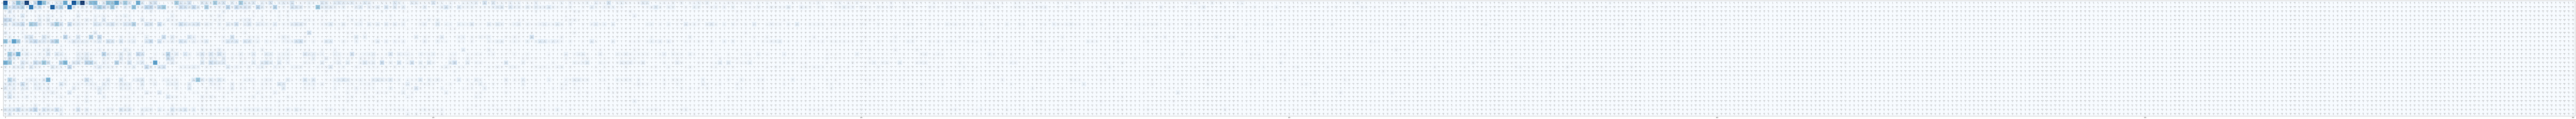

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(380,380))
# the line below creates an image plot: N is data for image and cmap is the color used
plt.imshow(N, cmap="Blues")
# using for loop to display the values and no of occurings in the data
for i in range(27):
  for j in range(601):
    # concatenate the two alpabets
    chstr =  itos2[j] + itos[i]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
# plt.axis('off')

### By using tensors and neurons


In [ ]:
word = list("emma")
word[2:]

['m', 'a']

In [26]:
import torch

In [ ]:
# preparation
chars2 = []

for w in words:
  chs = ['.'] + list(w) + ['.']
  chs2 = [s+chs[i+1] for i, s in enumerate(chs) if i < len(chs)-1]

  for ch12, ch3 in zip(chs2, chs[2:]):
    chars2.append(ch12)

len((set(chars2)))
# len(chars2)

601

In [ ]:
chars2[:5]

['.e', 'em', 'mm', 'ma', '.o']

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [ ]:
# create the dataset
xs = []
ys = []
for w in words[:1]:
  chs = ['.', '.'] + list(w) + ['.']
  chs2 = [s+chs[i+1] for i, s in enumerate(chs) if i < len(chs)-1]
  for ch12, ch3 in zip(chs2, chs[2:]):
    l = list(ch12)
    ix1 = stoi[l[0]]
    ix2 = stoi[l[1]]
    ix3 = stoi[ch3]

    xs.append([ix1, ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
#  more optimize version of above code
xs, ys = [], []

for w in words[:1]:
  chs = ['.', '.'] + list(w) + ['.']

  for i in range(len(chs) - 2):
    bigram = chs[i:i+2]
    next_char = chs[i+2]
    print(bigram, next_char)
    ix12 = [stoi[char] for char in bigram]
    ix3 = stoi[next_char]

    xs.append(ix12)
    ys.append(ix3)

# Convert lists to PyTorch tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)

['.', '.'] e
['.', 'e'] m
['e', 'm'] m
['m', 'm'] a
['m', 'a'] .


In [ ]:
xs

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# one hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape, xenc.dtype, xenc

(torch.Size([5, 2, 27]),
 torch.float32,
 tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.

In [36]:
# Forward pass
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad = True ).float()
logits = (xenc.view(5, -1) @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()
probs.shape, probs, loss

(torch.Size([5, 27]),
 tensor([[0.0820, 0.0239, 0.0099, 0.0032, 0.0036, 0.0026, 0.0019, 0.0316, 0.0136,
          0.0071, 0.0078, 0.0332, 0.0025, 0.0029, 0.1489, 0.3053, 0.0207, 0.0020,
          0.0181, 0.0036, 0.0194, 0.0037, 0.0005, 0.0085, 0.0094, 0.0734, 0.1608],
         [0.0237, 0.0177, 0.0107, 0.0049, 0.0223, 0.0096, 0.0111, 0.0090, 0.0071,
          0.0424, 0.0704, 0.0511, 0.0196, 0.0240, 0.2683, 0.0824, 0.0320, 0.0058,
          0.1061, 0.0203, 0.0267, 0.0060, 0.0026, 0.0565, 0.0026, 0.0264, 0.0407],
         [0.0224, 0.0482, 0.0110, 0.0675, 0.0691, 0.0033, 0.0108, 0.0058, 0.0093,
          0.0043, 0.1095, 0.0867, 0.0058, 0.0074, 0.0009, 0.0084, 0.0135, 0.0044,
          0.0651, 0.0046, 0.0327, 0.0632, 0.0720, 0.0006, 0.0040, 0.0079, 0.2616],
         [0.0226, 0.0417, 0.0201, 0.0403, 0.0219, 0.0021, 0.0284, 0.0040, 0.1099,
          0.0022, 0.0109, 0.2800, 0.0062, 0.0102, 0.0011, 0.0028, 0.0253, 0.0110,
          0.0432, 0.0012, 0.0131, 0.0155, 0.0178, 0.0045, 0.0386, 0.1600,

In [37]:
# backward pass
W.grad = None
loss.backward()

In [40]:
# update
W.data += -0.1 * W.grad

In [41]:
logits = (xenc.view(5, -1) @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()
loss

tensor(4.3819, grad_fn=<NegBackward0>)

In [48]:
# EVERYTHING AT ONE PLACE: Trigram model
xs, ys = [], []

for w in words:
  chs = ['.', '.'] + list(w) + ['.']

  for i in range(len(chs) - 2):
    bigram = chs[i:i+2]
    next_char = chs[i+2]
    # print(bigram, next_char)
    ix12 = [stoi[char] for char in bigram]
    ix3 = stoi[next_char]

    xs.append(ix12)
    ys.append(ix3)

# Convert lists to PyTorch tensors
xs = torch.tensor(xs)
ys = torch.tensor(ys)



456292

In [44]:
xs[:5], ys[:5]

(tensor([[ 0,  0],
         [ 0,  5],
         [ 5, 13],
         [13, 13],
         [13,  1]]),
 tensor([ 5, 13, 13,  1,  0]))

In [65]:
# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad = True )

In [51]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 2, 27])

In [71]:
for k in range(100):
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = (xenc.view(-1, 54) @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdim=True)
  # loss
  loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()
  print(loss.item())

  # bacward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -0.01 * W.grad

2.372166633605957
2.372159481048584
2.372152328491211
2.372144937515259
2.3721377849578857
2.3721303939819336
2.3721232414245605
2.3721158504486084
2.3721086978912354
2.3721015453338623
2.37209415435791
2.372087001800537
2.372079610824585
2.37207293510437
2.372065544128418
2.372058391571045
2.372051239013672
2.372044086456299
2.3720366954803467
2.3720295429229736
2.3720226287841797
2.3720157146453857
2.3720083236694336
2.3720014095306396
2.3719942569732666
2.3719871044158936
2.3719799518585205
2.3719727993011475
2.3719656467437744
2.3719589710235596
2.3719518184661865
2.3719449043273926
2.3719375133514404
2.3719303607940674
2.3719236850738525
2.3719165325164795
2.3719096183776855
2.3719024658203125
2.3718953132629395
2.3718883991241455
2.3718817234039307
2.3718745708465576
2.3718674182891846
2.3718605041503906
2.371853828430176
2.3718461990356445
2.371839761734009
2.3718326091766357
2.371825933456421
2.371819019317627
2.371811866760254
2.37180495262146
2.371798038482666
2.3717908859252

In [72]:
g = torch.Generator().manual_seed(21474836)

for i in range(10):
    out = ['.']  # Start with an initial character, here using '.' as an example
    while True:
        # Prepare the last two characters as input
        ix1 = stoi[out[-2]] if len(out) > 1 else stoi['.']  # Use '.' if there's no second last character
        ix2 = stoi[out[-1]]  # The last character

        # One-hot encode and concatenate the last two characters
        xenc1 = F.one_hot(torch.tensor([ix1]), num_classes=27).float()
        xenc2 = F.one_hot(torch.tensor([ix2]), num_classes=27).float()
        xenc = torch.cat((xenc1, xenc2), dim=-1)

        # Forward pass using the trigram context
        logits = (xenc.view(-1, 54) @ W)
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        # Sample the next character
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:  # Assuming '0' is the index for the end token, like '.'
            break
        out.append(itos[ix])

    print(''.join(out[1:]))  # Skip the initial '.' used for starting the sequence


ahaudonodkeliellelya
riganeerazil
azna
ranan
lyn
alenien
azela
zanverahha
emanikoistyna
tane


In [70]:
g = torch.Generator().manual_seed(21474836)

for i in range(10):
    out = ['.', '.']  # Start with two initial characters
    while True:
        # Use the last two characters as context
        ix1, ix2 = stoi[out[-2]], stoi[out[-1]]

        # One-hot encode the context characters and concatenate them
        xenc = torch.cat((F.one_hot(torch.tensor([ix1]), num_classes=27),
                          F.one_hot(torch.tensor([ix2]), num_classes=27)), dim=-1).float()

        # Forward pass to get the next character probabilities
        logits = xenc.view(1, -1) @ W  # Ensure the input is 2D: [1, 54]
        probs = torch.softmax(logits, dim=-1)

        # Sample the next character
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()

        if ix == 0:  # Assuming '0' is the index for the end-of-sequence token ('.')
            break
        out.append(itos[ix])

    # Print the generated name, excluding the initial dummy characters
    print(''.join(out[2:]))  # Skip the first two initial characters


ahaudonodkeliellelya
riganeerazil
azna
ranan
lyn
alenien
azela
zanverahha
emanikoistyna
tane


## Split the dataset into train, dev and test set

#### E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [75]:

def build_dataset(words):
  xs, ys = [], []

  for w in words:
    chs = ['.', '.'] + list(w) + ['.']

    for i in range(len(chs) - 2):
      bigram = chs[i:i+2]
      next_char = chs[i+2]
      # print(bigram, next_char)
      ix12 = [stoi[char] for char in bigram]
      ix3 = stoi[next_char]

      xs.append(ix12)
      ys.append(ix3)

  # Convert lists to PyTorch tensors
  xs = torch.tensor(xs)
  ys = torch.tensor(ys)
  print(xs.shape, ys.shape)
  return xs, ys


import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 2]) torch.Size([182437])
torch.Size([22781, 2]) torch.Size([22781])
torch.Size([22928, 2]) torch.Size([22928])


In [76]:
# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad = True )

In [79]:
for k in range(50):
  # forward pass
  xenc = F.one_hot(Xtr, num_classes=27).float()
  logits = (xenc.view(-1, 54) @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdim=True)
  # loss
  loss = -probs[torch.arange(probs.shape[0]), Ytr].log().mean()
  print(loss.item())

  # bacward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -.1 * W.grad

2.369089126586914
2.369084358215332
2.369079828262329
2.369075298309326
2.3690707683563232
2.3690664768218994
2.3690619468688965
2.3690576553344727
2.3690531253814697
2.369048595428467
2.369044303894043
2.369040012359619
2.369035243988037
2.3690309524536133
2.3690268993377686
2.3690226078033447
2.369018077850342
2.369014024734497
2.369009494781494
2.3690054416656494
2.3690011501312256
2.3689968585968018
2.368992805480957
2.368988275527954
2.3689844608306885
2.3689801692962646
2.36897611618042
2.368971824645996
2.3689677715301514
2.3689632415771484
2.368959426879883
2.368955373764038
2.3689513206481934
2.3689470291137695
2.368943214416504
2.36893892288208
2.3689353466033936
2.3689310550689697
2.368927001953125
2.3689231872558594
2.3689191341400146
2.36891508102417
2.368911027908325
2.3689072132110596
2.368903398513794
2.368899345397949
2.3688952922821045
2.368891716003418
2.3688879013061523
2.3688840866088867


In [81]:
# loss on dev set
xenc = F.one_hot(Xdev, num_classes=27).float()
logits = (xenc.view(-1, 54) @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# loss
loss = -probs[torch.arange(probs.shape[0]), Ydev].log().mean()
print(loss.item())

2.3826651573181152


In [82]:
# loss on test set
xenc = F.one_hot(Xte, num_classes=27).float()
logits = (xenc.view(-1, 54) @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# loss
loss = -probs[torch.arange(probs.shape[0]), Yte].log().mean()
print(loss.item())

2.3826820850372314


the dev and test sets are almost giving the same loss but a lil larger than the training loss

E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

In [86]:
# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad = True )

In [91]:


for k in range(50):
  # forward pass
  xenc = F.one_hot(Xtr, num_classes=27).float()
  logits = (xenc.view(-1, 54) @ W)
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdim=True)
  # loss
  loss = -probs[torch.arange(probs.shape[0]), Ytr].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # bacward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -.5 * W.grad

2.3987550735473633
2.3986568450927734
2.39856219291687
2.398470878601074
2.3983824253082275
2.398297071456909
2.398214101791382
2.398134469985962
2.398056983947754
2.397982358932495
2.3979101181030273
2.3978400230407715
2.3977725505828857
2.397707223892212
2.397643804550171
2.3975820541381836
2.3975226879119873
2.397465229034424
2.397408962249756
2.3973548412323
2.3973023891448975
2.3972513675689697
2.3972015380859375
2.397153615951538
2.3971071243286133
2.397061586380005
2.397017478942871
2.396975040435791
2.396933078765869
2.396892786026001
2.396852970123291
2.3968145847320557
2.396777391433716
2.396740674972534
2.3967056274414062
2.3966708183288574
2.396636962890625
2.396604061126709
2.396571636199951
2.3965401649475098
2.3965096473693848
2.396479368209839
2.3964498043060303
2.396421194076538
2.396393060684204
2.3963654041290283
2.39633846282959
2.3963119983673096
2.3962857723236084
2.3962604999542236


In [92]:
# loss on dev set
xenc = F.one_hot(Xdev, num_classes=27).float()
logits = (xenc.view(-1, 54) @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# loss
loss = -probs[torch.arange(probs.shape[0]), Ydev].log().mean()
print(loss.item())

2.4012656211853027


In [83]:
 g = torch.Generator().manual_seed(21474836)

for i in range(10):
    out = ['.', '.']  # Start with two initial characters
    while True:
        # Use the last two characters as context
        ix1, ix2 = stoi[out[-2]], stoi[out[-1]]

        # One-hot encode the context characters and concatenate them
        xenc = torch.cat((F.one_hot(torch.tensor([ix1]), num_classes=27),
                          F.one_hot(torch.tensor([ix2]), num_classes=27)), dim=-1).float()

        # Forward pass to get the next character probabilities
        logits = xenc.view(1, -1) @ W  # Ensure the input is 2D: [1, 54]
        probs = torch.softmax(logits, dim=-1)

        # Sample the next character
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()

        if ix == 0:  # Assuming '0' is the index for the end-of-sequence token ('.')
            break
        out.append(itos[ix])

    # Print the generated name, excluding the initial dummy characters
    print(''.join(out[2:]))  # Skip the first two initial characters

ahaudonodkwyzellely
yriganeerazil
el
jarmere
lyn
llenien
azela
zanverahha
em
kadoistyna
